In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to your original data directory
original_data_dir = 'data'

# Set the path to your new data directory
new_data_dir = 'new_data'

# Create train and test directories within the new data directory
train_dir = os.path.join(new_data_dir, 'train')
test_dir = os.path.join(new_data_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each class directory in the original data directory
for class_name in os.listdir(original_data_dir):
    class_path = os.path.join(original_data_dir, class_name)

    # Skip non-directory files
    if not os.path.isdir(class_path):
        continue

    # Create train and test subdirectories for each class
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # List all images in the class directory
    images = os.listdir(class_path)

    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Move images to train and test directories
    for image in train_images:
        src_path = os.path.join(class_path, image)
        dest_path = os.path.join(train_class_dir, image)
        shutil.copy(src_path, dest_path)

    for image in test_images:
        src_path = os.path.join(class_path, image)
        dest_path = os.path.join(test_class_dir, image)
        shutil.copy(src_path, dest_path)


In [3]:
import os
from torchvision import transforms
from torch.utils.data import DataLoader

from CustomDataset import CustomDataset
from dataprep import create_dataloaders
train_dir = 'model_data/train'
test_dir = 'model_data/test'

data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

custom_dataset = CustomDataset(root_dir=train_dir, transform=data_transform)
print(f"Number of samples in CustomDataset: {len(custom_dataset)}")

batch_size = 32
num_workers = os.cpu_count()
train_dataloader, test_dataloader, class_names = create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=data_transform,
    batch_size=batch_size,
    num_workers=num_workers
)

# Check DataLoader shapes
for images, labels in train_dataloader:
    print(f"Training batch shape - Images: {images.shape}, Labels: {labels.shape}")
    break

for images, labels in test_dataloader:
    print(f"Testing batch shape - Images: {images.shape}, Labels: {labels.shape}")
    break

Number of samples in CustomDataset: 963
Training batch shape - Images: torch.Size([32, 3, 224, 224]), Labels: torch.Size([32])
Testing batch shape - Images: torch.Size([32, 3, 224, 224]), Labels: torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


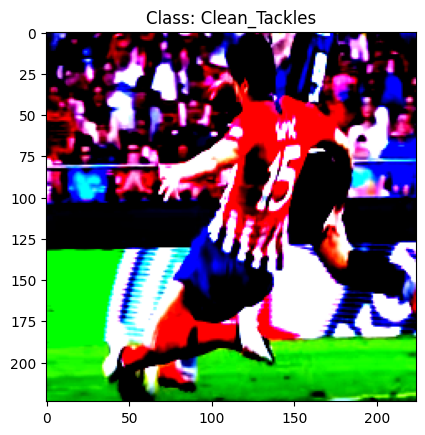

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


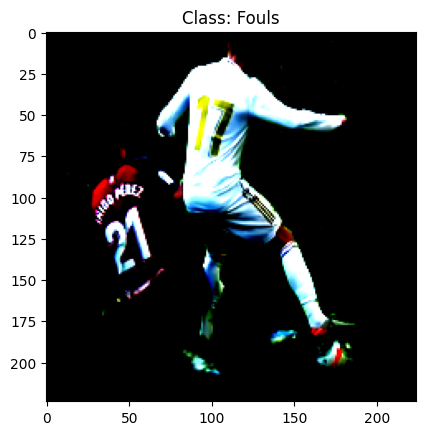

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


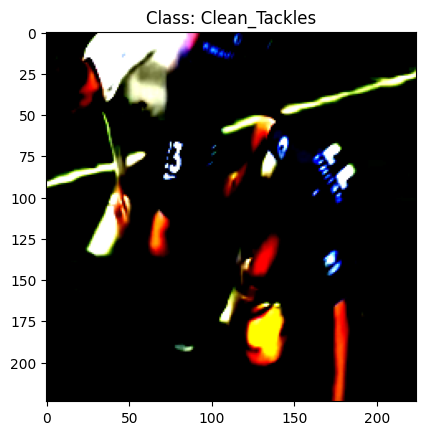

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


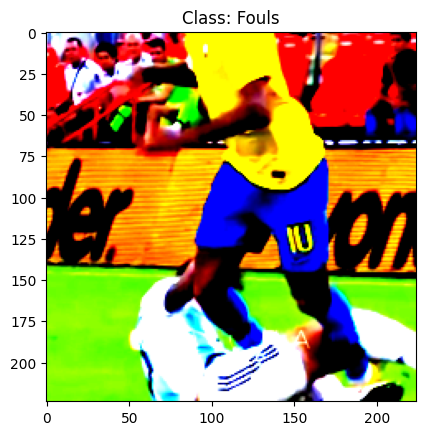

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


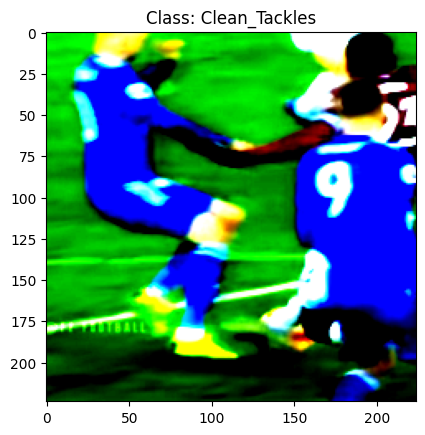

In [5]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# Function to convert a PyTorch tensor to a PIL image
def tensor_to_image(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)  # Change from (C, H, W) to (H, W, C)
    return image

# Get a batch of images and labels from the DataLoader
for images, labels in train_dataloader:
    # Display the first few images in the batch
    for i in range(min(5, images.size(0))):  # Display up to 5 images
        image = tensor_to_image(images[i])
        label = labels[i].item()

        # Map numeric label to class name
        class_name = class_names[label]

        # Display the image with its class name
        plt.imshow(image)
        plt.title(f"Class: {class_name}")
        plt.show()

    break  # Only display one batch
